In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2024:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
# Terminal_calcs=[]
# stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
# for crane in stack_cranes:   
#     Terminal_dummy = container_system.System(startyear = startyear, 
#                                              lifecycle = lifecycle, 
#                                              elements = demand + vessels, 
#                                              operational_hours = 7665,   # example Wijnand
#                                              debug=False,
#                                              stack_equipment = crane,
#                                              laden_stack = crane) 
#     NPV=Terminal_dummy.simulate()
#     Terminal_calcs.append(NPV)
# print(Terminal_calcs)


In [6]:
# rmg = Terminal_calcs[0]
# rtg = Terminal_calcs[1]
# sc = Terminal_calcs[2]
# rs = Terminal_calcs[3]

# fig, ax = plt.subplots(figsize=(16, 7))
# ax.plot(rmg, label="RMG")
# ax.plot(rtg, label="RTG")
# ax.plot(sc, label="Straddle carrier")
# ax.plot(rs, label="Reach stacker")
# plt.ylabel('Net present value')
# plt.xlabel('Years')
# plt.legend()
# plt.show()
# plt.savefig('C:/Users/908538/Google Drive/Afstuderen/02. Model/Masterfile/Plots/NPV_basis.png', dpi=400)


In [7]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,  
                         debug=True,
                         crane_type_defaults=container_defaults.sts_crane_data) 


# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [8]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 67
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 67
  Total cargo volume: 200000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after adding quay): inf
     Berth occupancy online (after adding quay): inf
  *** add STS crane to elements
     Berth occupancy planned (after adding crane): 0.5769080234833659
     Berth occ

  *** add tractor to elements
  *** add tractor to elements

Simulate year: 2025
  Total vessel calls: 200
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 200
  Total cargo volume: 600000
     a total of 1 Berth_01 is online; 1 total planned
     a total of 1 Quay_01 is online; 1 total planned
     a total of 4 STS_crane is online; 4 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): 0.547945205479452
     Berth occupancy online (@ start of year): 0.547945205479452
     Crane occupancy planned (@ start of year): 0.3913894324853229
     Crane occupancy online (@ start of year): 0.3913894324853229
     waiting time factor (@ start of year): 0.4896120106100941
     waiting time occupancy (@ start of year): 0.1916289669706826
     Horizontal transport online (@ start of year): 5
     Number of STS cranes (@start of year): 4
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements
  *** add tractor to elements

250 1 ajax
     Revenues (demand): 50000000
     Revenues (throughput): 0
250 1 ajax
     Revenues (demand): 50000000
     Revenues (throughput): 0
250 1 ajax
     Revenues (demand): 50000000
     Revenues (throughput): 50249999
250 1 ajax
     Revenues (demand): 50000000
     Revenues (throughput): 50249999
250 1 ajax
     Revenues (demand): 150000000
     Revenues (throughput): 95812500
250 1 ajax
     Revenues (demand): 150000000
     Revenues (throughput): 149999999
250 1 ajax
     Revenues (demand): 150000000
     Revenues (throughput): 149999999
250 1 ajax
     Revenues (demand): 150000000
     Revenues (throughput): 149999999
250 1 ajax
     Revenues (demand): 150000000
     Revenues (throughput): 149999999
250 1 ajax
     Revenues (demand): 150000000
     Revenues (throughput): 149999999
PV: [-1.46235840e+07 -3.33604604e+07  4.45826430e+07  4.52298825e+07
  2.18921917e+06  1.38723184e+08  1.40070483e+08  1.41256813e+08
  1.42301407e+08  1.43221197e+08]
NPV: 749590784.4352461
PV

array([-1.46235840e+07, -3.33604604e+07,  4.45826430e+07,  4.52298825e+07,
        2.18921917e+06,  1.38723184e+08,  1.40070483e+08,  1.41256813e+08,
        1.42301407e+08,  1.43221197e+08])

## Report all elements

In [9]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

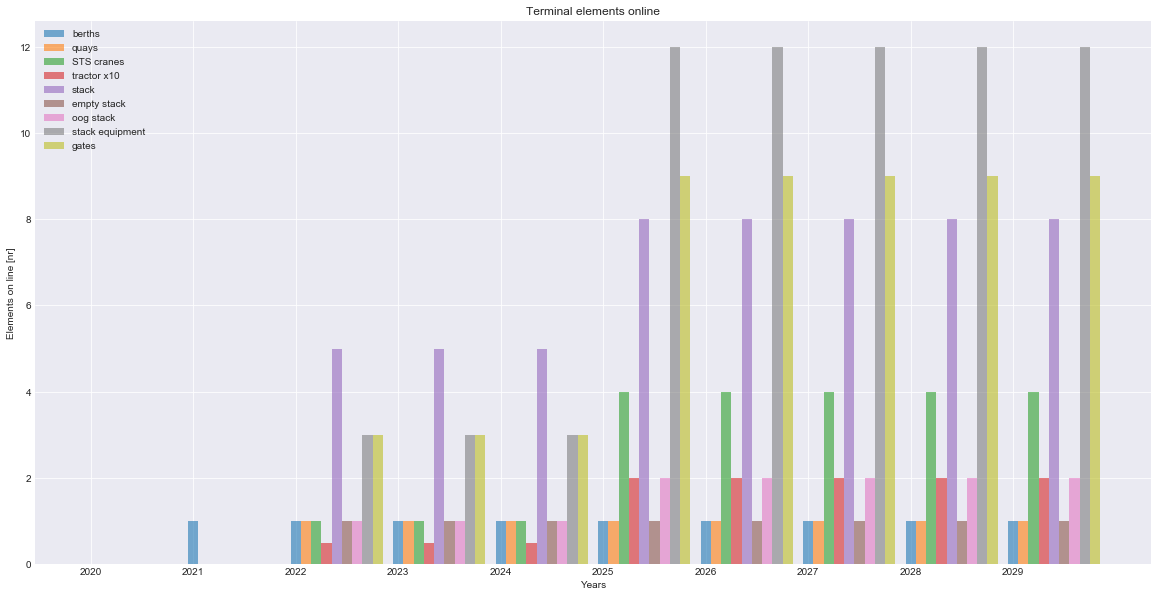

In [10]:
Terminal.terminal_elements_plot()

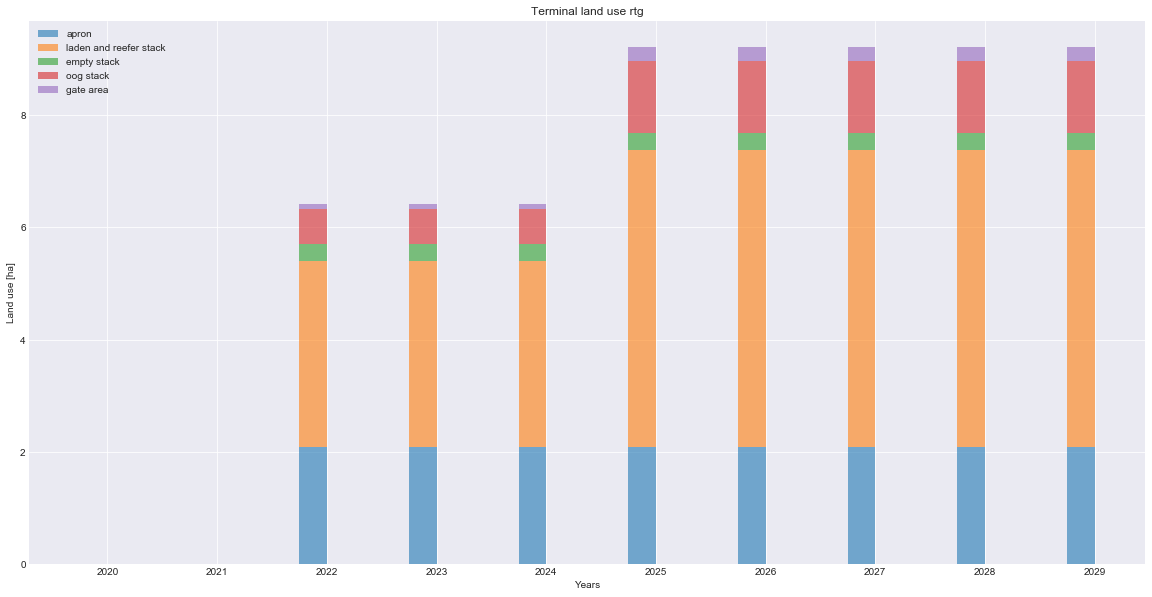

In [11]:
Terminal.land_use_plot()

In [12]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

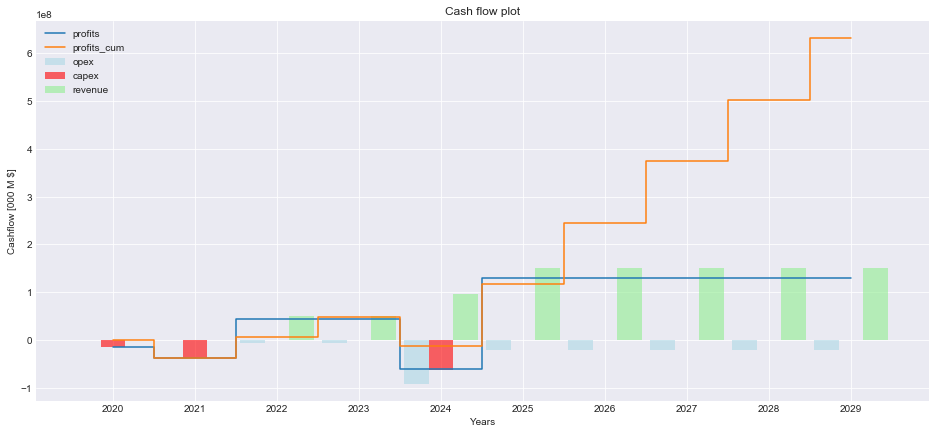

In [13]:
Terminal.cashflow_plot(cash_flows)

## SandBox

In [14]:
Terminal.NPV()

PV: [-1.46235840e+07 -3.33604604e+07  4.45826430e+07  4.52298825e+07
  2.18921917e+06  1.38723184e+08  1.40070483e+08  1.41256813e+08
  1.42301407e+08  1.43221197e+08]
NPV: 749590784.4352461


array([-1.46235840e+07, -3.33604604e+07,  4.45826430e+07,  4.52298825e+07,
        2.18921917e+06,  1.38723184e+08,  1.40070483e+08,  1.41256813e+08,
        1.42301407e+08,  1.43221197e+08])